<a href="https://colab.research.google.com/github/hankaj/stock_price_prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: project to learn Machine Learnig in Python - Stock Price Prediction using recurrent neural network called Long Short Term Memory.

In [2]:
# Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock quote
# Dataframe, Apple stock information 2013-2021
df = web.DataReader('AAPL', data_source='yahoo', start='2013-01-01', end='2021-02-11')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.039789
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.824715
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.356062
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.259851
2013-01-08,18.996071,18.616072,18.900356,18.761070,458707200.0,16.303608
...,...,...,...,...,...,...
2021-02-05,137.419998,135.860001,137.350006,136.759995,75524000.0,136.759995
2021-02-08,136.960007,134.919998,136.029999,136.910004,71297200.0,136.910004
2021-02-09,137.880005,135.850006,136.619995,136.009995,76774200.0,136.009995


In [4]:
# Get the number of rows in columns in the data set
df.shape

(2043, 6)

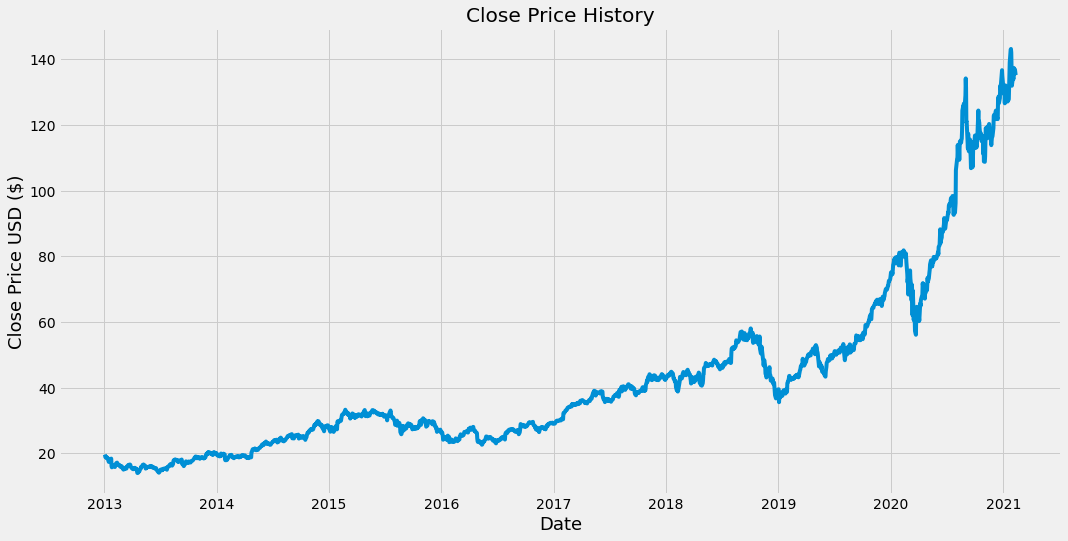

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on (80% of the dataset)
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1635

In [8]:
# Scale the data
# Good practice to preprocess data before giving it to the model
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Values are between 0 and 1
scaled_data

array([[0.04380933],
       [0.04189388],
       [0.03772025],
       ...,
       [0.94466473],
       [0.93986647],
       [0.93785432]])

In [9]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  # Print to see how it works
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.04380933, 0.04189388, 0.03772025, 0.03686341, 0.03725313,
       0.0349839 , 0.03675563, 0.03586838, 0.03074117, 0.02636576,
       0.03194073, 0.03099821, 0.03025747, 0.03157589, 0.03412982,
       0.01657569, 0.01364032, 0.0163905 , 0.0187233 , 0.01832529,
       0.01795492, 0.01743805, 0.01431474, 0.01860446, 0.01846902,
       0.02147349, 0.02334195, 0.02471012, 0.02138504, 0.02113904,
       0.02102296, 0.01924571, 0.01919871, 0.01611963, 0.01534846,
       0.01666137, 0.01444741, 0.01615279, 0.01493663, 0.01406045,
       0.0110394 , 0.00815932, 0.01122458, 0.00970992, 0.0110698 ,
       0.0113849 , 0.01308475, 0.01047554, 0.01045343, 0.0116005 ,
       0.01468511, 0.01801849, 0.01767853, 0.01701239, 0.01719205,
       0.01972941, 0.02019099, 0.01951658, 0.01701239, 0.01440871])]
[0.010608216319641275]

[array([0.04380933, 0.04189388, 0.03772025, 0.03686341, 0.03725313,
       0.0349839 , 0.03675563, 0.03586838, 0.03074117, 0.02636576,
       0.03194073, 0.03099821, 0.0